Final Project <br>
Chintia Hildayanti<br>
DS26

Dataset : Adult Census Income <br>
sumber : https://archive.ics.uci.edu/dataset/2/adult <br>
Objective : saya seorang pegawai pemerintah yang ingin melakukan analisis terhadap masyarakat Amerika Serikat yang memiliki penghasilan kurang dari 50.000 dollar per tahun, agar dapat diseleksi siapa saja yang dikecualikan dari pengenaan pajak penghasilan, mendapat bantuan sosial pemerintah, serta mendapat fasilitas pelatihan keterampilan.

### Install & Import Package

In [339]:
pip install streamlit

In [407]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import streamlit as st

### Load The Dataset

In [341]:
# load dataset
df = pd.read_csv('https://archive.ics.uci.edu/static/public/2/data.csv')

###Listing of attributes:

US Census Bureau 1996 <br>

* age: usia. <br>
* workclass: kelas pekerja (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).<br>
* fnlwgt: final weight (sebuah bobot yang diberikan kepada setiap baris atau individu dalam dataset untuk mewakili jumlah orang dalam populasi yang memiliki karakteristik serupa seperti yang diwakili oleh baris tersebut).<br>
* education: level pendidikan / pendidikan terakhir (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)<br>
* education-num: level pendidikan (numerik).<br>
* marital-status: status pernikahan (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse).<br>
* occupation: pekerjaan (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces).<br>
* relationship: hubungan keluarga (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).<br>
* race: ras (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black).<br>
* sex: jenis kelamin (Female, Male).<br>
* capital-gain: keuntungan modal. <br>
* capital-loss: kerugian modal. <br>
* hours-per-week: jam kerja dalam seminggu.<br>
* native-country: negara asal (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands).<br>
* income : >50K, <=50K (binary).<br>

In [342]:
# tampilkan dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Data Cleaning

In [344]:
# mengecek jumlah baris, missing value, presentase missing value, nilai unik dan nilai duplikat
pd.DataFrame({'count': df.shape[0],
              'nulls': df.isnull().sum(),
              'nulls%': df.isnull().mean() * 100,
              'cardinality': df.nunique(),
              'duplicated' : df.duplicated().sum()
             })

,count,nulls,nulls%,cardinality,duplicated
age,48842,0,0.000000,74,29
workclass,48842,963,1.971664,9,29
fnlwgt,48842,0,0.000000,28523,29
education,48842,0,0.000000,16,29
education-num,48842,0,0.000000,16,29
marital-status,48842,0,0.000000,7,29
occupation,48842,966,1.977806,15,29
relationship,48842,0,0.000000,6,29
race,48842,0,0.000000,5,29
sex,48842,0,0.000000,2,29


Hasil :<br>
terdapat 3 kolom yang mengandung missing value < 5% yaitu, workclass, occupation dan native-country <br>
karena kolom-kolom tersebut mengandung missing value < 5% dan jika dijumlahkan tetap < 5% dari jumlah seluruh data <br>
maka dari itu saya memilih untuk menghapus baris yang mengandung missing value tersebut,<br>
dan terdapat 29 data duplikat saya juga memilih untuk menghapusnya.

In [345]:
# drop missing values
df.dropna(subset=['workclass','occupation','native-country'], inplace=True)

In [346]:
# drop data duplikat
df = df.drop_duplicates()

In [347]:
# mengecek kembali jumlah baris, missing value, presentase missing value, nilai unik dan nilai duplikat
pd.DataFrame({'count': df.shape[0],
              'nulls': df.isnull().sum(),
              'nulls%': df.isnull().mean() * 100,
              'cardinality': df.nunique(),
              'duplicated' : df.duplicated().sum()
             })

,count,nulls,nulls%,cardinality,duplicated
age,47592,0,0.0,74,0
workclass,47592,0,0.0,9,0
fnlwgt,47592,0,0.0,27946,0
education,47592,0,0.0,16,0
education-num,47592,0,0.0,16,0
marital-status,47592,0,0.0,7,0
occupation,47592,0,0.0,15,0
relationship,47592,0,0.0,6,0
race,47592,0,0.0,5,0
sex,47592,0,0.0,2,0


### Exploratory Data Analysis

####Statistical Summary

In [348]:
# statistical summary for numericals data
numericals = df.select_dtypes(include=['int64', 'float64']).columns
df[numericals].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47592.000000,4.759200e+04,47592.000000,47592.00000,47592.000000,47592.000000
mean,38.644541,1.897310e+05,10.091444,1091.80253,87.907022,40.602895
std,13.557307,1.055717e+05,2.567580,7489.46073,404.127864,12.259716
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.175848e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,4356.000000,99.000000


In [349]:
# statistical summary for categoricals data
categoricals = df.select_dtypes(include=['object']).columns
df[categoricals].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47592,47592,47592,47592,47592,47592,47592,47592,47592
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33690,15437,21959,6105,19389,40760,31918,42936,24698


####Deteksi Outlier

Text(0, 0.5, 'Values')

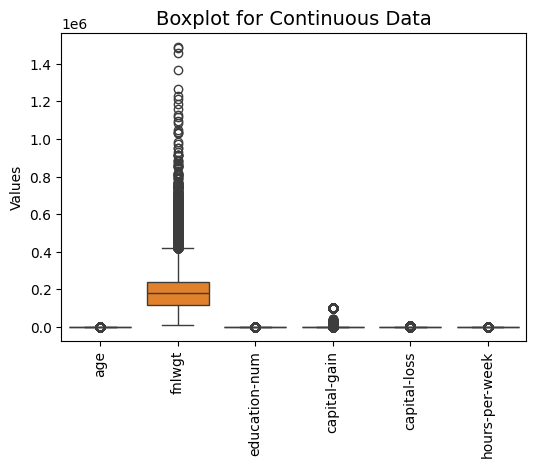

In [350]:
# check outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])

plt.xticks(rotation=90)
plt.title('Boxplot for Continuous Data', fontsize=14)
plt.ylabel('Values', fontsize=10)

In [351]:
# membuat fungsi untuk melihat jumlah dan presentase outlier
def detect_outliers(df, column_name):

    # Menghitung IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Batas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outlier
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Jumlah outlier
    jumlah_outlier = outliers.shape[0]

    # Persentase outlier
    persentase_outlier = (jumlah_outlier / df.shape[0]) * 100

    return jumlah_outlier, persentase_outlier

In [352]:
# deteksi jumlah outlier pada kolom final weight
detect_outliers(df, 'fnlwgt')

(1413, 2.968986384266263)

In [353]:
# deteksi jumlah outlier pada kolom capital gain
detect_outliers(df, 'capital-gain')

(3964, 8.329130946377543)

In [354]:
# deteksi jumlah outlier pada kolom capital loss
detect_outliers(df, 'capital-loss')

(2232, 4.689863842662632)

In [355]:
# deteksi jumlah outlier pada kolom hours per week
detect_outliers(df, 'hours-per-week')

(12947, 27.204151958312323)

In [356]:
# melihat data outlier pada kolom final weight >1.200.000
df.loc[df['fnlwgt'] > 1200000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8258,35,Private,1226583,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K
14449,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K
15569,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K
16739,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K
18138,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
40535,27,Private,1490400,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
47084,31,Private,1210504,10th,6,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K.


In [357]:
# melihat data outlier pada kolom capital gain >50.000 dollar
df.loc[df['capital-gain'] > 50000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,32,Self-emp-inc,225053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K.
48582,61,Self-emp-not-inc,151369,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,30,United-States,>50K.
48591,36,Private,224566,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,99999,0,45,United-States,>50K.
48598,42,Private,32878,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,42,United-States,>50K.


In [358]:
# melihat data outlier pada kolom hours per week > 90 jam
df.loc[df['hours-per-week'] > 90]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
272,50,Self-emp-not-inc,30653,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,<=50K
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
2920,63,Self-emp-not-inc,26904,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,98,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45475,60,Private,197311,HS-grad,9,Divorced,Priv-house-serv,Unmarried,White,Female,0,0,99,United-States,<=50K.
45888,52,Self-emp-not-inc,284648,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,>50K.
45929,42,Self-emp-inc,203233,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,99,United-States,>50K.
47760,48,Private,250736,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K.


Kesimpulan :<br>
* outlier kolom age dianggap masih wajar karena ada manusia yang hidup sampai 90 tahun, dan masih bekerja (asumsi saya data tersebut benar), saya memilih membiarkan saja dari pada menghapusnya yang beresiko kehilangan insight dari data tersebut.
* outlier kolom final weight juga dianggap masih wajar karena ini angka dari datanya, jadi saya memilih membiarkan saja
* outlier kolom education num, dibiarkan saja karena itu nomor jenjang pendidikan
* outlier kolom capital gain dan capital loss dianggap masih wajar jadi di biarkan saja, karena bisnis sangat fleksibel (bisa sangat untung, bisa juga sangat merugi)
* outlier kolom hours per week dianggap masih wajar, asumsi saya bahwa benar ada orang yang jam kerjanya selama seminggu mencapai 99 jam, jadi dibiarkan saja.
* saya akan mengatasi outlier ini dengan standarisasi



#### Visualisasi

In [359]:
# menghapus titik yang tidak perlu pada data, agar hanya ada 2 unik value
df['income'] = df['income'].replace({'>50K.' :'>50K', '<=50K.':'<=50K'})

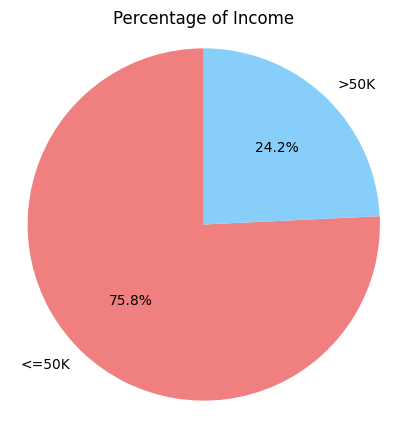

In [360]:
# menghitung jumlah income
income_counts = df['income'].value_counts()

# membuat pie plot income
plt.figure(figsize=(5, 5))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral','lightskyblue'])
plt.title('Percentage of Income')
plt.axis('equal')
plt.show()

Hasil : Imbalance data target, sehingga hasil evaluasi nanti tidak bisa pakai akurasi

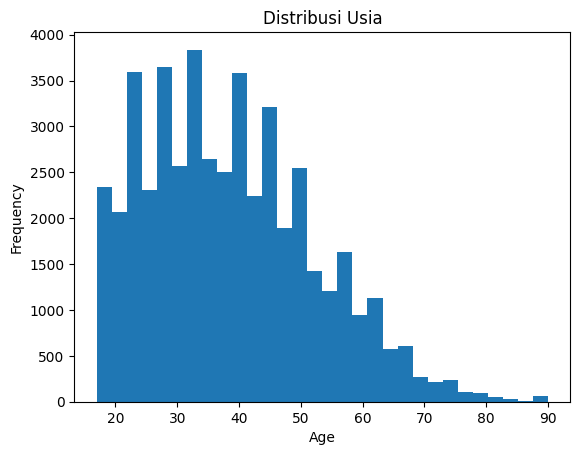

In [361]:
# membuat grafik distribusi usia
df['age'].plot(kind='hist', bins=30, title='Distribusi Usia')
plt.xlabel('Age')
plt.show()

Hasil :<br>
* Usia 20 hingga sekitar 40 tahun adalah kelompok usia dengan jumlah individu tertinggi, dengan frekuensi mencapai puncak sekitar 3.500-4.000 individu di beberapa interval usia.<br>
* Usia 30-an tampak menjadi kelompok paling dominan.<br>
*Jumlah individu menurun secara signifikan setelah usia 50 tahun, dan sangat sedikit orang yang berusia di atas 70 tahun, ini masuk akal.<br>

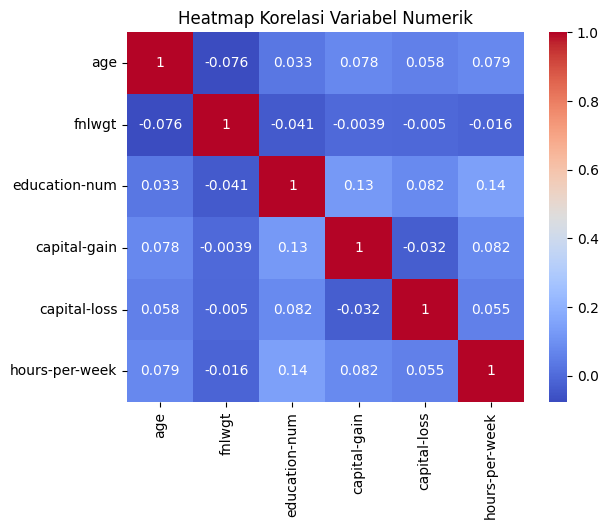

In [362]:
# membuat correlation heatmap
corr_matrix = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

Hasil : tidak ada kolom yang saling berkorelasi tinggi.

### Deep Dive Analysis

In [363]:
# merubah value ? menjadi Others agar lebih mudah dibaca
df['workclass'] = df['workclass'].replace({'?' :'Others'})

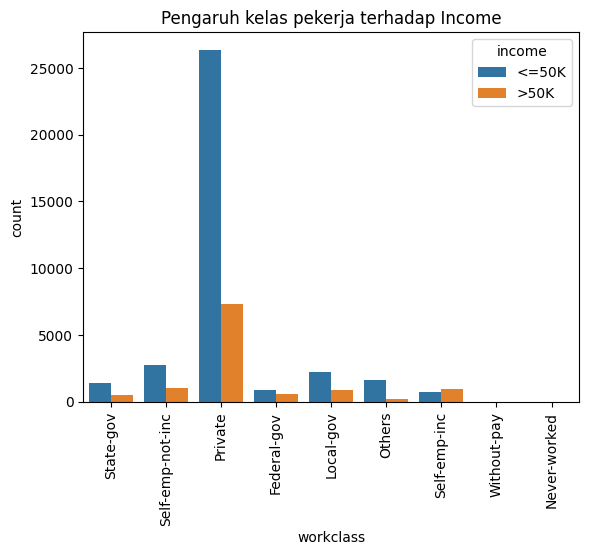

In [364]:
# membuat barplot pengaruh kelas pekerja terhadap income
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Pengaruh kelas pekerja terhadap Income')
plt.xticks(rotation=90)
plt.show()

Hasil :<br>
* kelas pekerja private yang paling banyak jumlahnya baik yang berpenghasilan <=50.000 dollar maupun >50.000 dollar. <br>
* diseluruh kelas, jumlah orang yang memiliki penghasilan >50.000 dollar jauh lebih sedikit tetapi pada kelas self employment income (pengusaha swasta) jauh lebih banyak, ini masuk akal
* jadi kelas pekerja berpengaruh terhadap income.

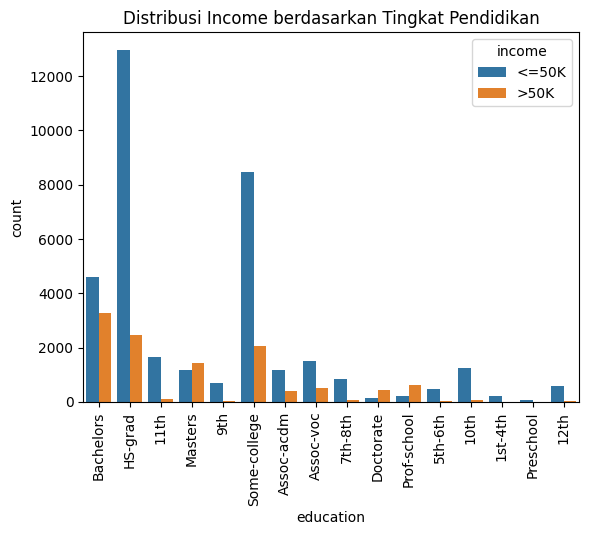

In [365]:
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=90)
plt.title('Distribusi Income berdasarkan Tingkat Pendidikan')
plt.show()


Hasil: <br>
* jumlah orang dengan jenjang pendidikan SMA paling mendominasi, tetapi yang memiliki penghasilan >50.000 dollar sangat sedikit
* jenjang pendidikan master, doctorate dan prof-school memiliki jumlah orang yang berpenghasilan >50.000 jauh lebih banyak
* artinya jenjang pendidikan berpengaruh terhadap income.


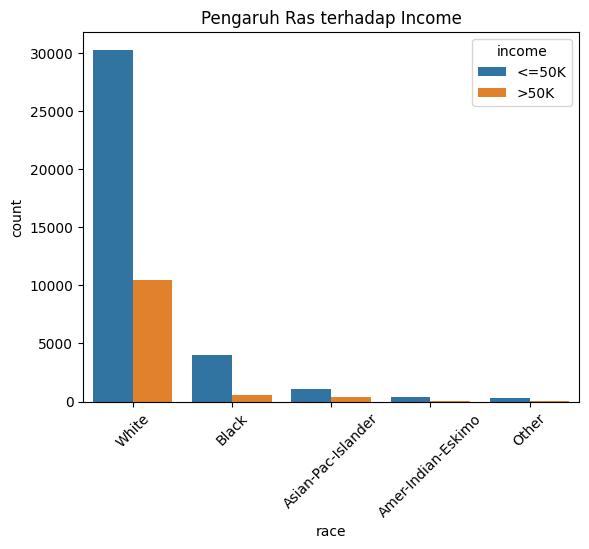

In [366]:
# membuat barplot pengaruh ras terhadap income
sns.countplot(x='race', hue='income', data=df)
plt.title('Pengaruh Ras terhadap Income')
plt.xticks(rotation=45)
plt.show()

Hasil :<br>
* mayoritas masyarakat dari ras kulit putih
* ras tidak mempengaruhi penghasilan

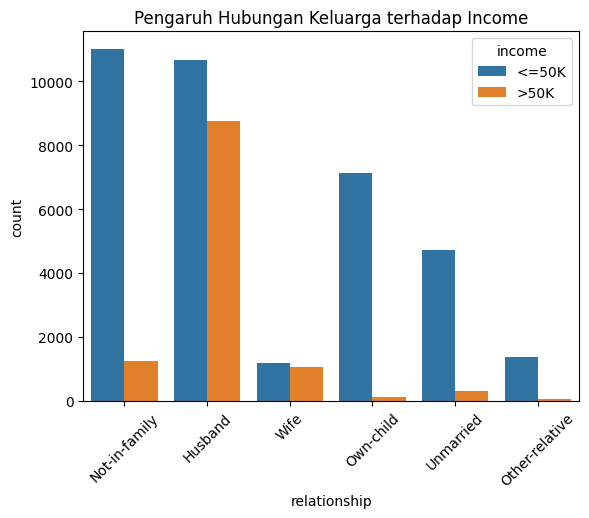

In [367]:
# membuat barplot hubungan keluarga terhadap income
sns.countplot(x='relationship', hue='income', data=df)
plt.title('Pengaruh Hubungan Keluarga terhadap Income')
plt.xticks(rotation=45)
plt.show()

Hasil :
* Not in family dan husband mendominasi
* relationship mempengaruhi income

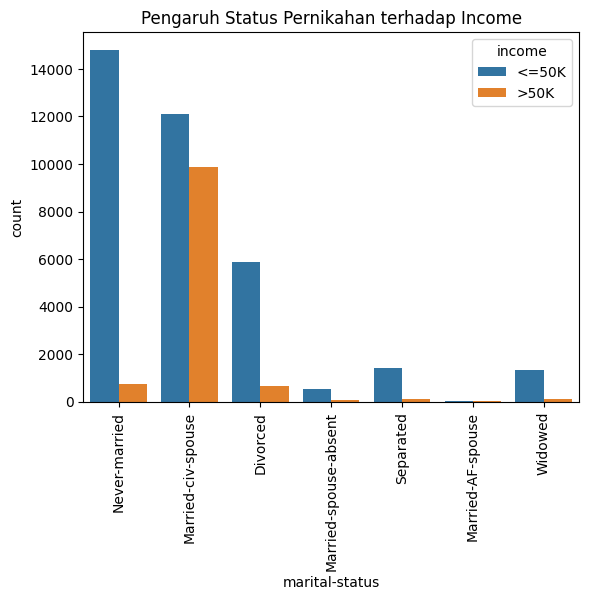

In [368]:
# membuat bar chart pengaruh status pernikahan terhadap income
sns.countplot(x='marital-status', hue='income', data=df)
plt.title('Pengaruh Status Pernikahan terhadap Income')
plt.xticks(rotation=90)
plt.show()

Hasil :
* never married san married civil spouse mendominasi
* status pernikahan mempengaruhi income

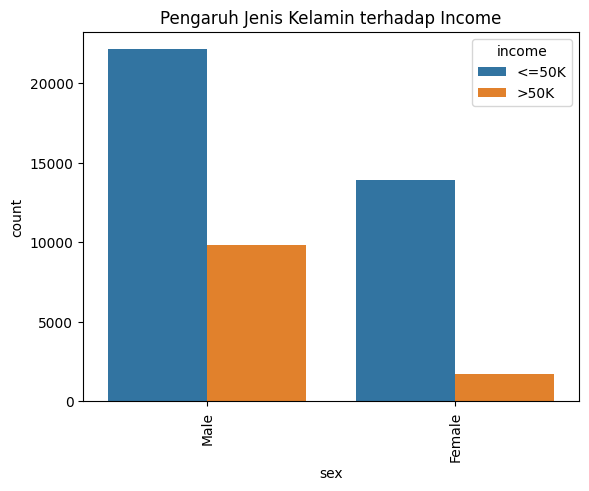

In [369]:
# membuat barplot jenis kelamin
sns.countplot(x='sex', hue='income', data=df)
plt.title('Pengaruh Jenis Kelamin terhadap Income')
plt.xticks(rotation=90)
plt.show()

Hasil :<br>
* jumlah laki-laki lebih banyak dari perempuan
* pada keduanya, orang yang memiliki penghasilan >50.000 dollar jauh lebih sedikit
* jenis kelamin mempengaruhi income.

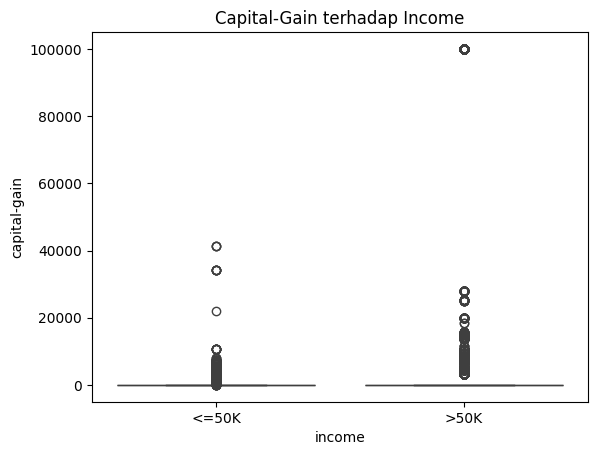

In [370]:
# membuat boxplot capital gain
sns.boxplot(x='income', y='capital-gain', data=df)
plt.title('Capital-Gain terhadap Income')
plt.show()


Hasil :<br>
Hubungan antara capital-gain dan pendapatan tampak tidak terlalu kuat di mayoritas populasi, tetapi outlier menunjukkan bahwa orang dengan capital-gain tinggi cenderung lebih mungkin memiliki pendapatan >50.000 dollar

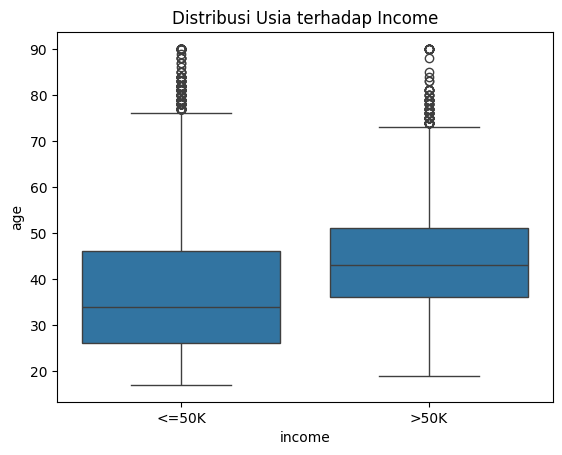

In [371]:
# membuat boxplot distribusi usia terhadap income
sns.boxplot(x='income', y='age', data=df)
plt.title('Distribusi Usia terhadap Income')
plt.show()

Hasil: terlihat dari nilai median yang cukup berbeda, artinya umur mempengaruhi penghasilan

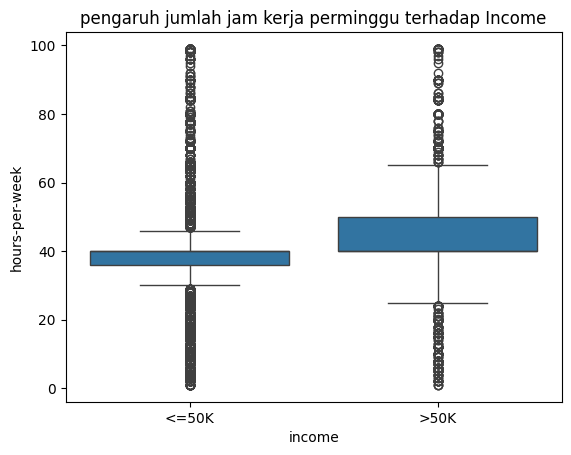

In [372]:
# membuat boxplot pengaruh jam kerja perminggu terhadap income
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('pengaruh jumlah jam kerja perminggu terhadap Income')
plt.show()

Hasil: terlihat dari nilai median yang cukup berbeda, artinya umur mempengaruhi penghasilan

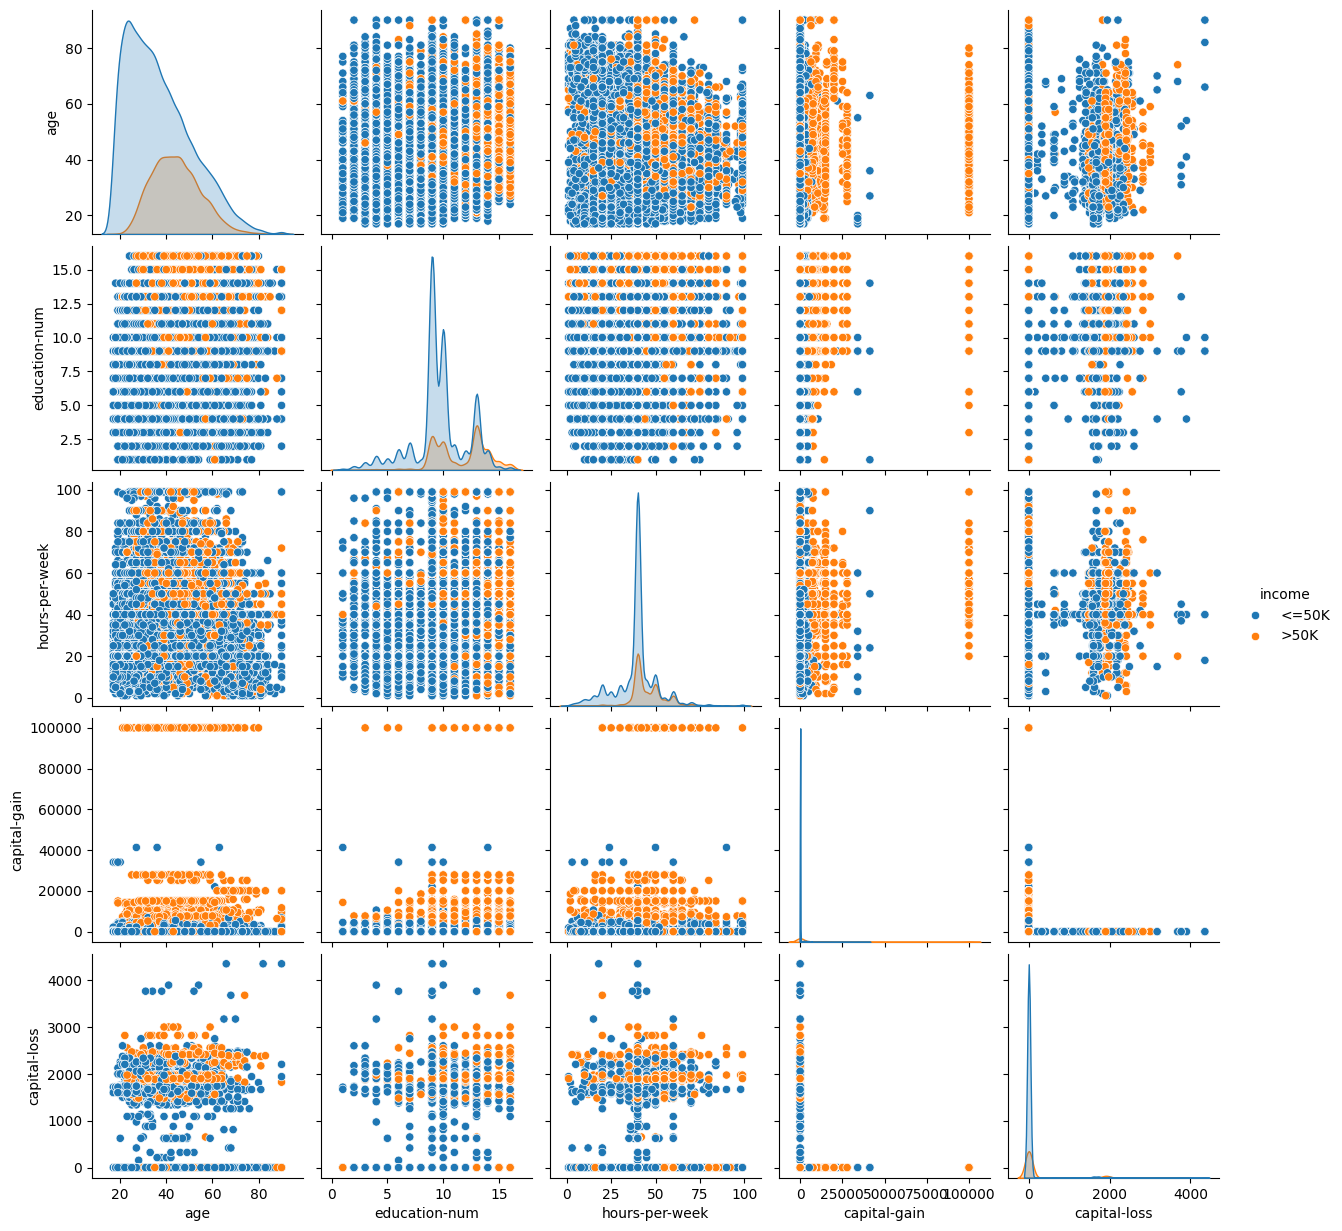

In [373]:
# membuat pair plot numerikal kolom terhadap taget
sns.pairplot(df, hue='income', vars=['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss'])
plt.show()

###Feature Engineering

In [374]:
label_encoder = LabelEncoder()

# Fit dan transform data
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

In [375]:
# Membuat kolom baru <=50K berdasarkan kolom income
df['income_encoded'] = df['income'].apply(lambda x: 1 if x == '<=50K' else 0)

In [376]:
# Ganti 'United-States' menjadi 1, dan negara lainnya menjadi 0

df['native-country'] = df['native-country'].apply(lambda x: 1 if x == 'United-States' else 0).astype(int)


In [377]:
freq_encoding_marital_status = df['marital-status'].value_counts()
freq_encoding_marital_status

,count
marital-status,
Married-civ-spouse,21959
Never-married,15536
Divorced,6523
Separated,1497
Widowed,1443
Married-spouse-absent,600
Married-AF-spouse,34


In [378]:
freq_encoding_occupation = df['occupation'].value_counts()
freq_encoding_occupation

,count
occupation,
Prof-specialty,6105
Craft-repair,6084
Exec-managerial,6056
Adm-clerical,5586
Sales,5474
Other-service,4887
Machine-op-inspct,3003
Transport-moving,2341
Handlers-cleaners,2065


In [379]:
freq_encoding_relationship = df['relationship'].value_counts()
freq_encoding_relationship

,count
relationship,
Husband,19389
Not-in-family,12265
Own-child,7223
Unmarried,5021
Wife,2253
Other-relative,1441


In [380]:
freq_encoding_workclass = df['race'].value_counts()
freq_encoding_workclass

,count
race,
White,40760
Black,4533
Asian-Pac-Islander,1446
Amer-Indian-Eskimo,460
Other,393


In [381]:
cats = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']

for column in df[cats]:
    frequency_encoding = df[column].value_counts()
    df[column + '_encoded'] = df[column].map(frequency_encoding)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,income,sex_encoded,income_encoded,workclass_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,1,<=50K,1,1,1965,15536,5586,12265,40760
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,1,<=50K,1,1,3837,21959,6056,19389,40760
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,1,<=50K,1,1,33690,6523,2065,12265,40760
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,1,<=50K,1,1,33690,21959,2065,19389,4533
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,0,<=50K,0,1,33690,21959,6105,2253,4533


* melakukan label encoding pada kolom sex
* melakukan label encoding pada kolom native country dengan hanya menjadikan 2 unik value masyarakat asli Amerika Serikan dan bukan masyarakat asli (dengan asumsi asal negara mempengaruhi target).
* membuat kolom baru yang berisi nilai binary dari kolom income dan dijadikan target
* melakukan one hot encoding pada kolom-kolom kategorikal lainnya yang mengandung nilai unik >2

### Feature Selection

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     47592 non-null  int64 
 1   workclass               47592 non-null  object
 2   fnlwgt                  47592 non-null  int64 
 3   education               47592 non-null  object
 4   education-num           47592 non-null  int64 
 5   marital-status          47592 non-null  object
 6   occupation              47592 non-null  object
 7   relationship            47592 non-null  object
 8   race                    47592 non-null  object
 9   sex                     47592 non-null  object
 10  capital-gain            47592 non-null  int64 
 11  capital-loss            47592 non-null  int64 
 12  hours-per-week          47592 non-null  int64 
 13  native-country          47592 non-null  int64 
 14  income                  47592 non-null  object
 15  sex_enc

* menghapus kolom education karena sudah diwakili oleh kolom education-num
* menghapus kolom income karena sudah diwakili oleh kolom <=50K yang berisi nilai numerik binary

In [383]:
# drop kolom yang tidak dibutuhkan
df_new = df.select_dtypes(exclude=['object'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     47592 non-null  int64
 1   fnlwgt                  47592 non-null  int64
 2   education-num           47592 non-null  int64
 3   capital-gain            47592 non-null  int64
 4   capital-loss            47592 non-null  int64
 5   hours-per-week          47592 non-null  int64
 6   native-country          47592 non-null  int64
 7   sex_encoded             47592 non-null  int64
 8   income_encoded          47592 non-null  int64
 9   workclass_encoded       47592 non-null  int64
 10  marital-status_encoded  47592 non-null  int64
 11  occupation_encoded      47592 non-null  int64
 12  relationship_encoded    47592 non-null  int64
 13  race_encoded            47592 non-null  int64
dtypes: int64(14)
memory usage: 5.4 MB


### Multicollinearity Handling

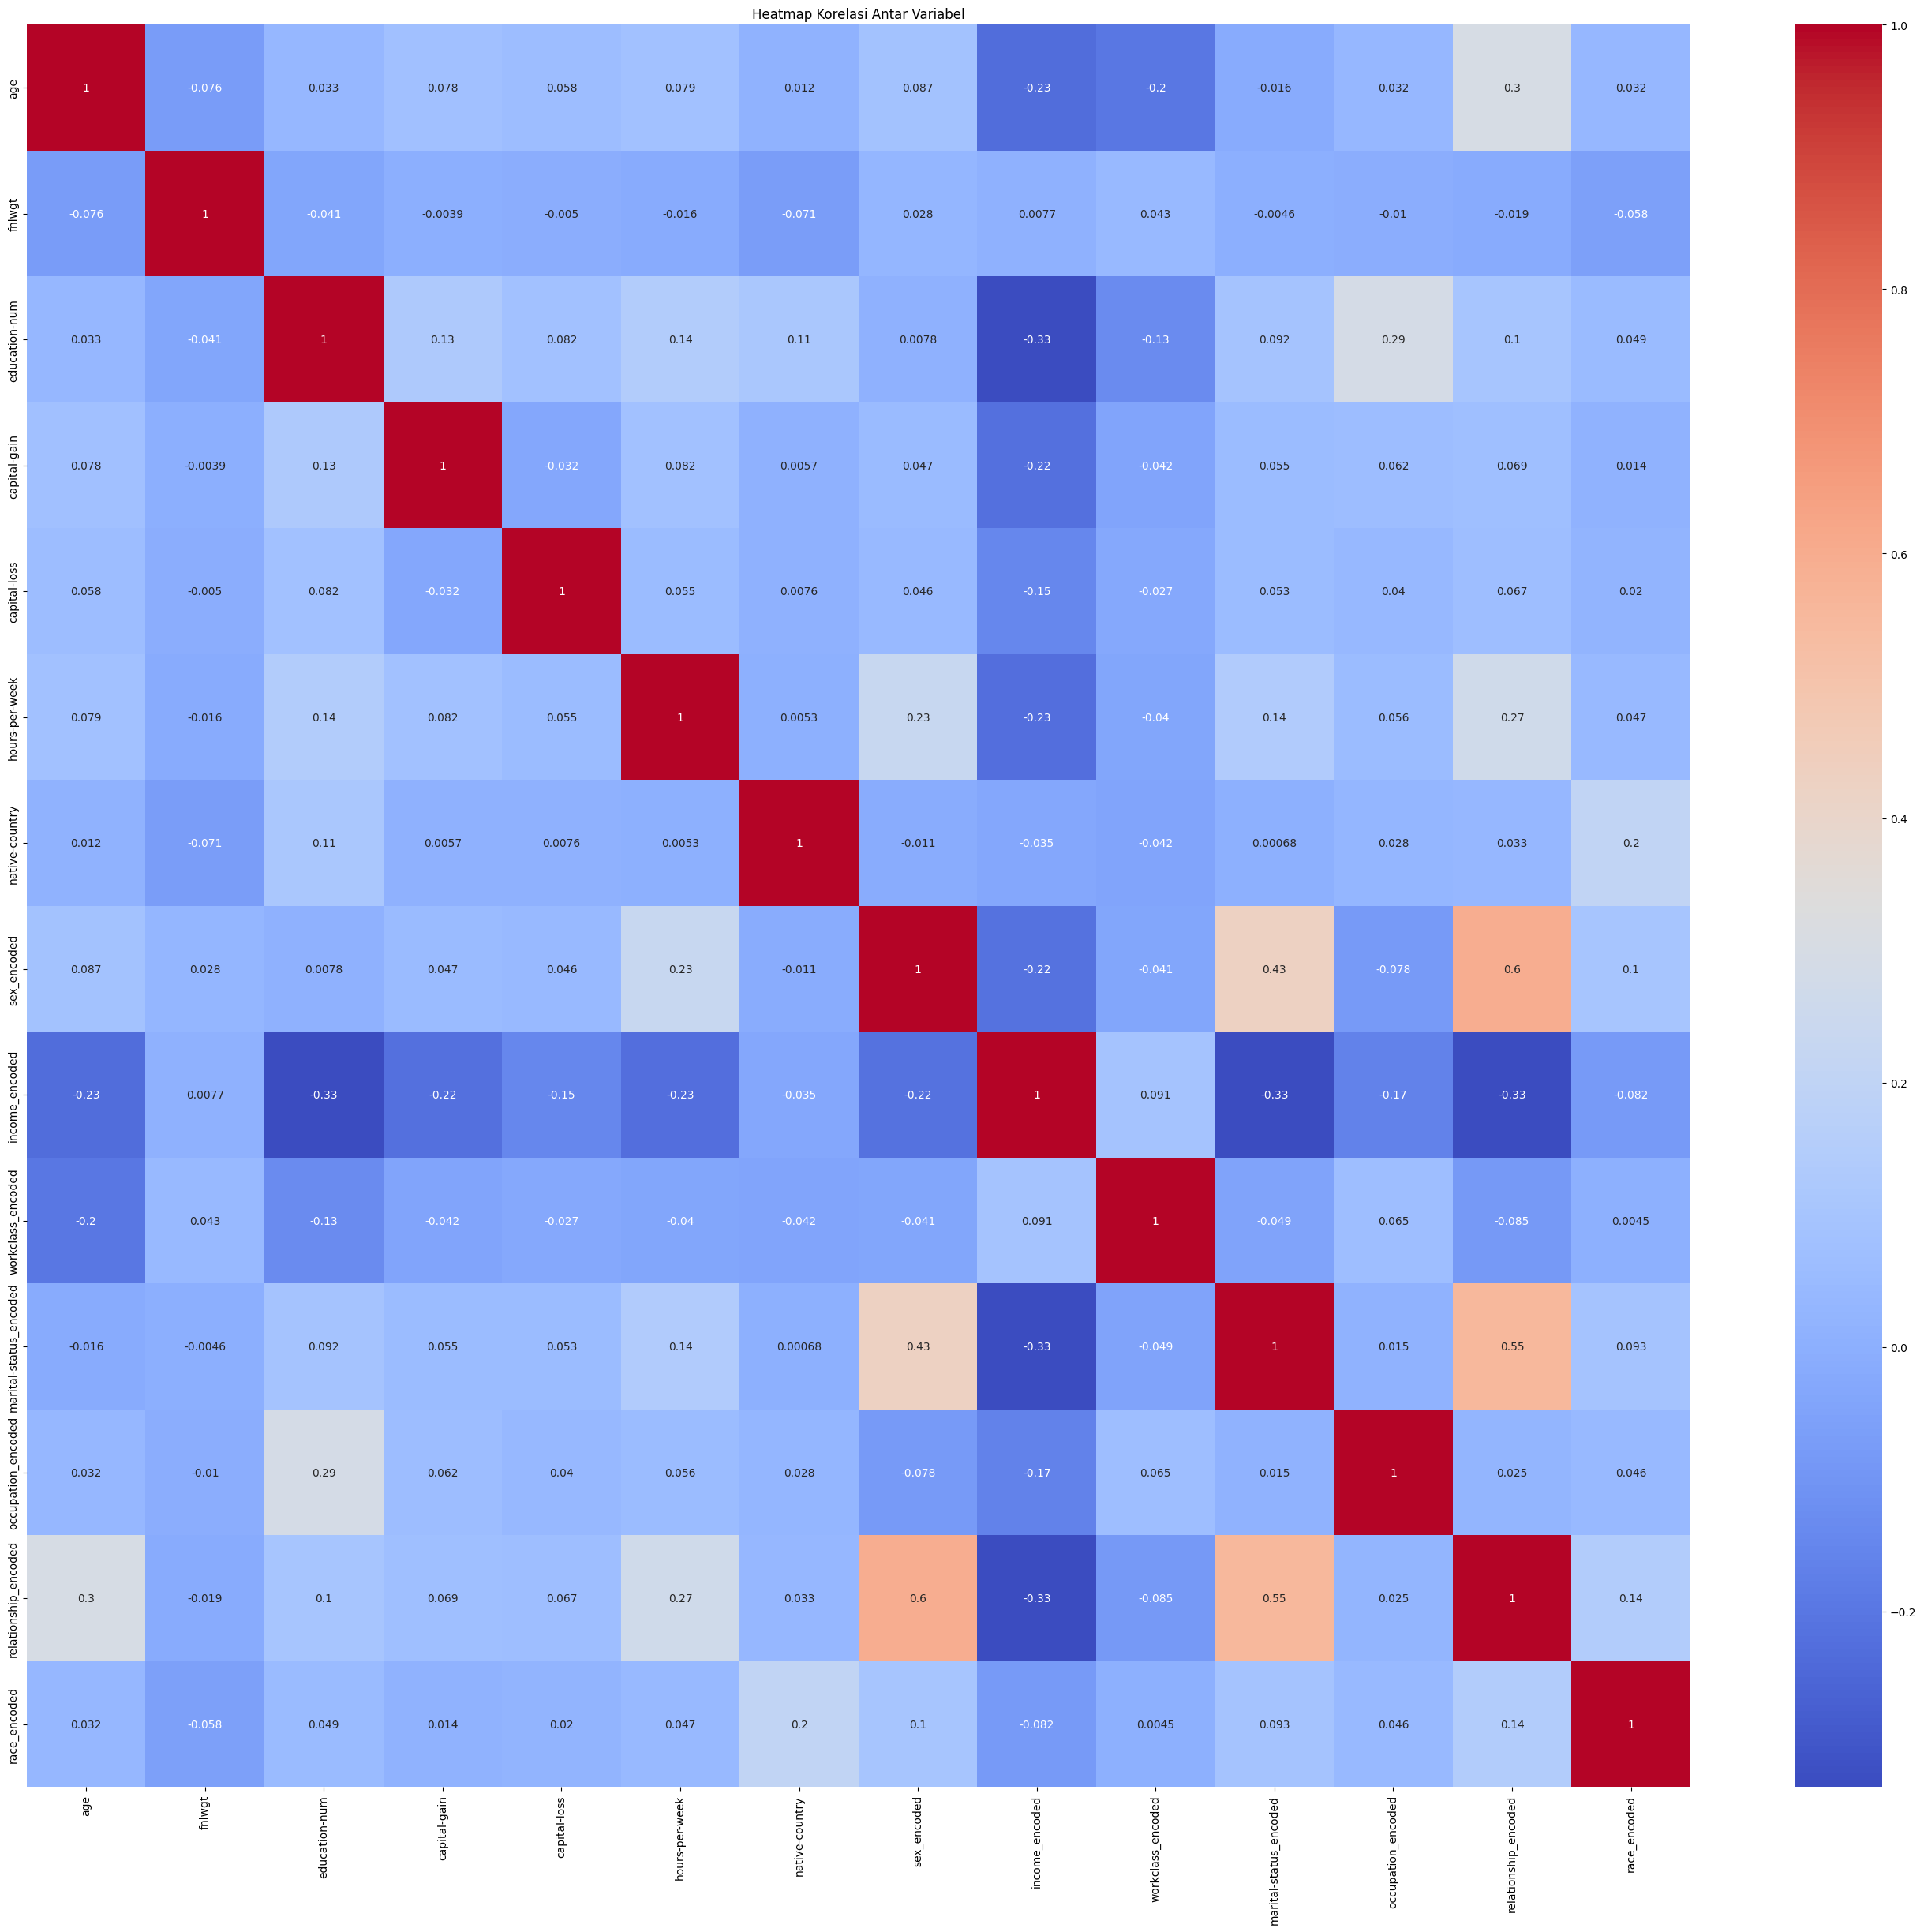

In [384]:
# create correlation heatmap of numericals data

plt.figure(figsize=(34, 29))
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Interpretasi : kolom race black dan kolom race white saling berkorelasi tinggi yaitu -0.79, <br>
maka dari itu saya mempertahankan kolom race white dan menghapus kolom race black, karena data race white adalah mayoritas.

### Train Test Split

In [385]:
# Train test split sebelum standarisasi

feature = df_new.drop('income_encoded', axis=1)
target = df_new['income_encoded']

ftr_train, ftr_test, tg_train,tg_test = train_test_split(feature,target,
                                                test_size = 0.20,
                                                random_state = 42)

### Standarization (Feature Scalling)

In [386]:
# standard scalling

scaler = RobustScaler()
scaler.fit(ftr_train)
X_std = scaler.transform(feature)
df_std = pd.DataFrame(data = X_std, columns = feature.columns)
df_std.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,sex_encoded,workclass_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded
0,0.10,-0.838353,1.000000,2174.0,0.0,0.0,0.0,0.0,-1.062707,0.000000,0.036352,0.000000,0.0
1,0.65,-0.790204,1.000000,0.0,0.0,-5.4,0.0,0.0,-1.000000,1.000000,0.188900,0.585566,0.0
2,0.05,0.309335,-0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,-1.403238,-1.106459,0.000000,0.0
3,0.80,0.467824,-1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,-1.106459,0.585566,-36227.0
4,-0.45,1.329342,1.000000,0.0,0.0,0.0,-1.0,-1.0,0.000000,1.000000,0.204804,-0.822949,-36227.0


In [387]:
# Train test split setelah standarisasi

feature2 = df_std
target2 = df_new['income_encoded']

ftr2_train, ftr2_test, tg2_train,tg2_test = train_test_split(feature2,target2,
                                                test_size = 0.20,
                                                random_state = 42)

### Model Training

In [388]:
# define & training logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(ftr2_train, tg2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [389]:
# define & training decision tree classifier model
decision_tree_clf = DecisionTreeClassifier(random_state=42)
decision_tree_clf.fit(ftr2_train, tg2_train)

DecisionTreeClassifier(random_state=42)

In [390]:
# define & training random forest model
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(ftr2_train, tg2_train)

RandomForestClassifier(random_state=42)

In [391]:
# define & XGBoost classifier model
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(ftr2_train, tg2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Model Evaluation

saya menggunakan metrik evaluasi f1 score karena saya berasumsi baik false positif maupun false negatif sama-sama penting.<br>
agar tidak salah sasaran, jadi perlu diperlu diperhatikan keduanya

Logistik Regression

In [392]:
# evaluasi model logistic regression pada data train
logreg_pred_train = logreg.predict(ftr2_train)
print(classification_report(tg2_train, logreg_pred_train))

              precision    recall  f1-score   support

           0       0.71      0.56      0.62      9194
           1       0.87      0.93      0.90     28879

    accuracy                           0.84     38073
   macro avg       0.79      0.74      0.76     38073
weighted avg       0.83      0.84      0.83     38073



In [393]:
# evaluasi model logistic regression pada data test
logreg_pred_test = logreg.predict(ftr2_test)
print(classification_report(tg2_test, logreg_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.55      0.63      2345
           1       0.86      0.93      0.90      7174

    accuracy                           0.84      9519
   macro avg       0.79      0.74      0.76      9519
weighted avg       0.83      0.84      0.83      9519



Interpretasi : model logistic regression fit untuk dataset ini, karena nilai f1 score dari data train dan data test sama hasilnya yaitu 90%

Decision Tree

In [394]:
# evaluasi model decision tree pada data train
dt_pred_train = decision_tree_clf.predict(ftr2_train)
print(classification_report(tg2_train, dt_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9194
           1       1.00      1.00      1.00     28879

    accuracy                           1.00     38073
   macro avg       1.00      1.00      1.00     38073
weighted avg       1.00      1.00      1.00     38073



In [395]:
# evaluasi model decision tree pada data test
dt_pred_test = decision_tree_clf.predict(ftr2_test)
print(classification_report(tg2_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      2345
           1       0.88      0.87      0.88      7174

    accuracy                           0.81      9519
   macro avg       0.75      0.75      0.75      9519
weighted avg       0.82      0.81      0.81      9519



Interpretasi : model decision tree overfit pada dataset ini, karena nilai f1 score dari data train dan data test jauh berbeda hasilnya yaitu 100% dan 87%

Random Forest

In [396]:
# evaluasi model random forest pada data train
rf_pred_train = random_forest_clf.predict(ftr2_train)
print(classification_report(tg2_train, rf_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9194
           1       1.00      1.00      1.00     28879

    accuracy                           1.00     38073
   macro avg       1.00      1.00      1.00     38073
weighted avg       1.00      1.00      1.00     38073



In [397]:
# evaluasi model random forest pada data test
rf_pred_test = random_forest_clf.predict(ftr2_test)
print(classification_report(tg2_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      2345
           1       0.88      0.92      0.90      7174

    accuracy                           0.85      9519
   macro avg       0.81      0.78      0.79      9519
weighted avg       0.85      0.85      0.85      9519



Interpretasi : model random forest overfit pada dataset ini, karena nilai f1 score dari data train dan data test jauh berbeda hasilnya yaitu 100% dan 90%

XGBoost

In [398]:
# evaluasi model XGBoost Classifier pada data train
xgb_pred_train = xgb_clf.predict(ftr2_train)
print(classification_report(tg2_train, xgb_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      9194
           1       0.92      0.96      0.94     28879

    accuracy                           0.90     38073
   macro avg       0.88      0.84      0.86     38073
weighted avg       0.90      0.90      0.90     38073



In [399]:
# evaluasi model XGBoost Classifier pada data test
xgb_pred_test = xgb_clf.predict(ftr2_test)
print(classification_report(tg2_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      2345
           1       0.90      0.94      0.92      7174

    accuracy                           0.87      9519
   macro avg       0.84      0.80      0.82      9519
weighted avg       0.87      0.87      0.87      9519



Interpretasi : model xgboost fit untuk dataset ini, karena nilai f1 score dari data train dan data test hampir sama hasilnya yaitu 93% dan 92%

sejauh ini saya memilih model xgboost sebagai model terbaik karena modelnya fit dan memiliki nilai f1 score paling tinggi dari model-model lainnya, lalu saya coba lakukan hyperparameter tunning pada model terpilih yaitu xgboost.

Hyperparameter tunning

In [400]:
# hyperparameter tuning menggunakan model terbaik yaitu XGBoost Classifier

parameters = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, 4, 5]
}

# using GridSearchCV with f1 as scoring metric
xgb_clf_gridcv = GridSearchCV(xgb_clf, parameters, cv=5, scoring='f1')

# fitting the model
xgb_clf_gridcv.fit(ftr2_train, tg2_train)

# print best parameters
print("Best parameters found: ", xgb_clf_gridcv.best_params_)

Best parameters found:  {'max_depth': 5, 'n_estimators': 40}


best parameter:<br>
max_depth: 5<br>
n_estimator: 50<br>
f1: 92% (pembulatan keatas)


In [401]:
# menampilkan result best parameter berdasarkan rank
cv_result = pd.DataFrame(xgb_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
23,"{'max_depth': 5, 'n_estimators': 40}",0.918262,1
22,"{'max_depth': 5, 'n_estimators': 30}",0.918004,2
24,"{'max_depth': 5, 'n_estimators': 50}",0.917984,3
18,"{'max_depth': 4, 'n_estimators': 40}",0.917681,4
19,"{'max_depth': 4, 'n_estimators': 50}",0.917604,5
17,"{'max_depth': 4, 'n_estimators': 30}",0.916824,6
14,"{'max_depth': 3, 'n_estimators': 50}",0.916422,7
21,"{'max_depth': 5, 'n_estimators': 20}",0.916377,8
13,"{'max_depth': 3, 'n_estimators': 40}",0.915365,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.914874,10


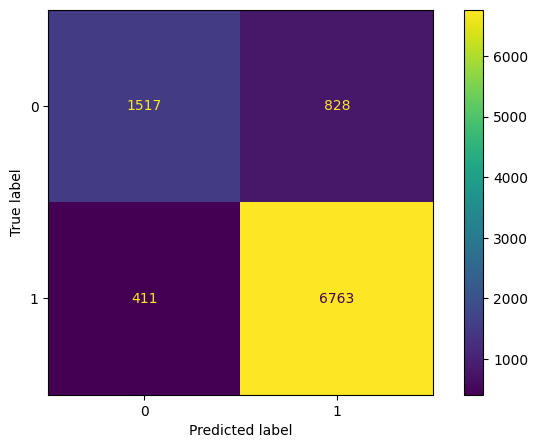

In [402]:
# menampilkan confusion matrix
fig, ax = plt.subplots(figsize=(8,5))
xgb_pred = xgb_clf_gridcv.best_estimator_.predict(ftr2_test)

cm = confusion_matrix(tg2_test, xgb_pred, labels=xgb_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Interpretasi :
* model memprediksi 411 orang berpenghasilan >50K dollar padahal sebenarnya berpenghasilan <=50K dollar (false negatif)
* model memprediksi 800 orang berpenghasilan <=50K dollar padahal sebenarnya berpenghasilan >50K dollar (false positif)


saya tidak tahu model ini mengalami kutukan dimensi atau tidak karena memiliki 45 features dan saya tidak melakukan reduksi dimensi atau feature selection

In [403]:
joblib.dump(logreg, 'logreg_model.pkl')

['logreg_model.pkl']

In [404]:
# Simpan model menggunakan joblib
joblib.dump(xgb_clf, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [408]:
# Load models
logreg_model = joblib.load("logreg_model.pkl")
xgb_model = joblib.load("xgboost_model.pkl")

# Title
st.title("Income Prediction App")

# Sidebar for model selection
model_choice = st.sidebar.selectbox(
    'Choose Model',
    ('Logistic Regression', 'XGBoost')
)

# Input features
st.write("## Input Features")
age = st.number_input('Age', min_value=1, max_value=100, value=25)
workclass = st.selectbox('Workclass', options=[0, 1, 2, 3, 4, 5, 6])  # Example encoding for categorical values
education_num = st.slider('Education-Num', min_value=1, max_value=16, value=10)
hours_per_week = st.slider('Hours per Week', min_value=1, max_value=100, value=40)

# You can add more inputs as necessary

# Prepare input data for model
input_data = np.array([[age, workclass, 0, 0, education_num, 0, 0, 0, 0, 0, 0, 0, hours_per_week, 0]])  # Dummy values

# Prediction button
if st.button('Predict'):
    if model_choice == 'Logistic Regression':
        prediction = log_reg_model.predict(input_data)
    else:
        prediction = xgb_model.predict(input_data)

    if prediction[0] == 1:
        st.success("Predicted: Income >50K")
    else:
        st.error("Predicted: Income <=50K")

2024-09-27 11:01:49.076 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 11:01:49.429 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-27 11:01:49.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 11:01:49.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 11:01:49.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 11:01:49.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 11:01:49.458 Session state does not function when running a script without `streamlit run`
2024-09-27 11:01:49.461 Thread 'MainThread': missing ScriptRunContext! 